In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv("./housing.csv")

In [3]:
dataset.tail()

,RM,LSTAT,PTRATIO,MEDV
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0
488,6.030,7.88,21.0,249900.0


In [4]:
columns = dataset.columns.to_list()

In [5]:
data = dataset

In [6]:
sns.set_theme(style="whitegrid", context="notebook")

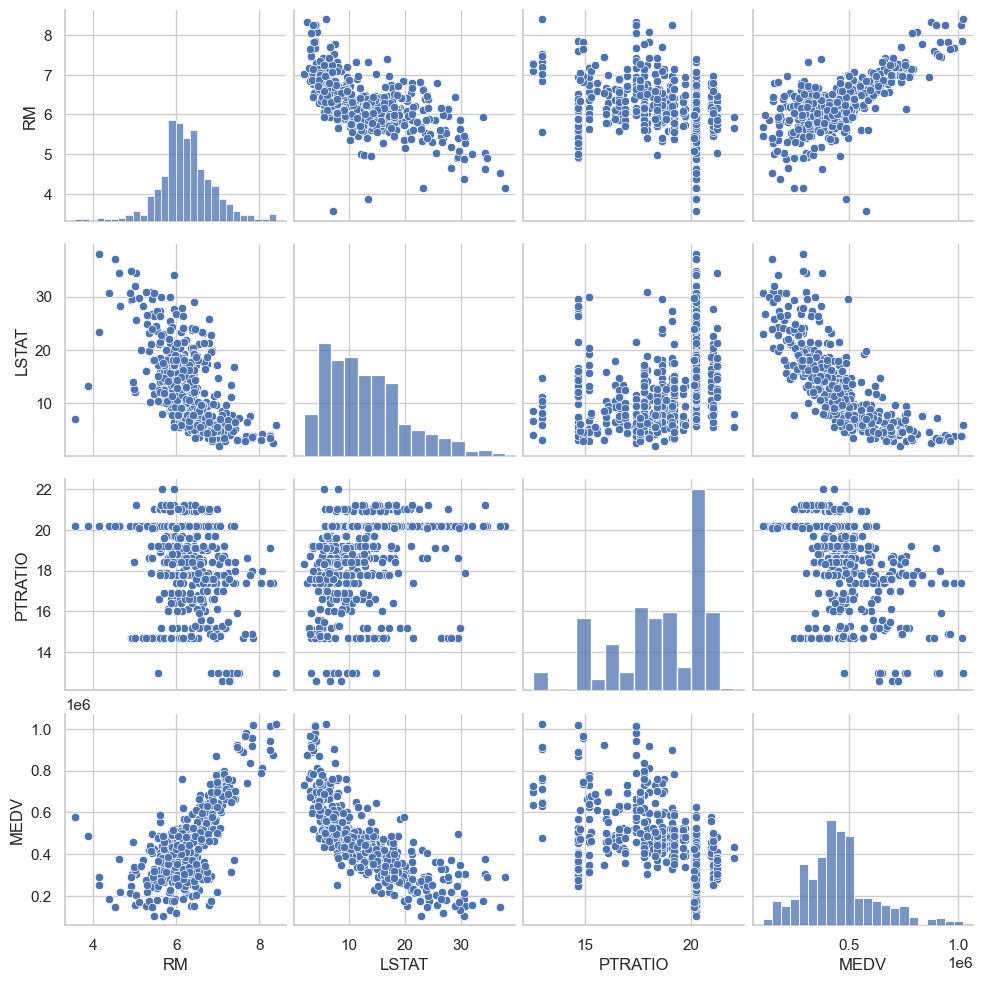

In [7]:
sns.pairplot(dataset, height=2.5)

In [8]:
cm = np.corrcoef(dataset.values.T)    

In [9]:
cm

array([[ 1.        , -0.61203322, -0.30455931,  0.69720922],
       [-0.61203322,  1.        ,  0.3604446 , -0.76067006],
       [-0.30455931,  0.3604446 ,  1.        , -0.5190335 ],
       [ 0.69720922, -0.76067006, -0.5190335 ,  1.        ]])

In [10]:
sns.set_theme(font_scale=1.5)

<Axes: >

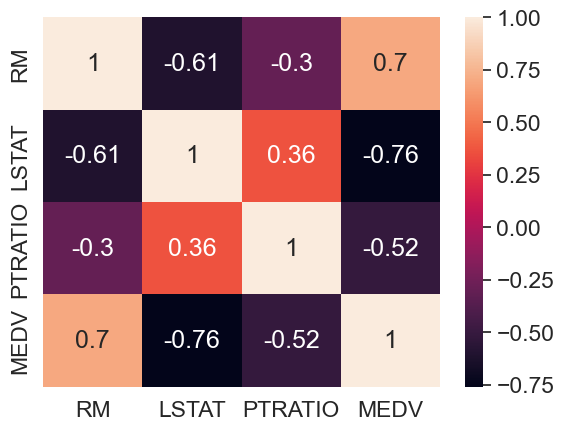

In [11]:
sns.heatmap(cm, cbar=True, annot=True, yticklabels=columns, xticklabels=columns)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [13]:
X = dataset["RM"].values.reshape(-1,1)

In [14]:
Y = dataset["MEDV"].values.reshape(-1,1)

In [15]:
scX = StandardScaler()
scY = StandardScaler()

In [16]:
standarX = scX.fit_transform(X)

In [17]:
standarY = scY.fit_transform(Y)

In [18]:
slr = LinearRegression()

In [19]:
slr.fit(standarX,standarY)

LinearRegression()

Análisis de Resultado

In [20]:
predict = slr.predict(standarX)

Text(0.5, 0, 'Promedio de habitaciones [RM]')

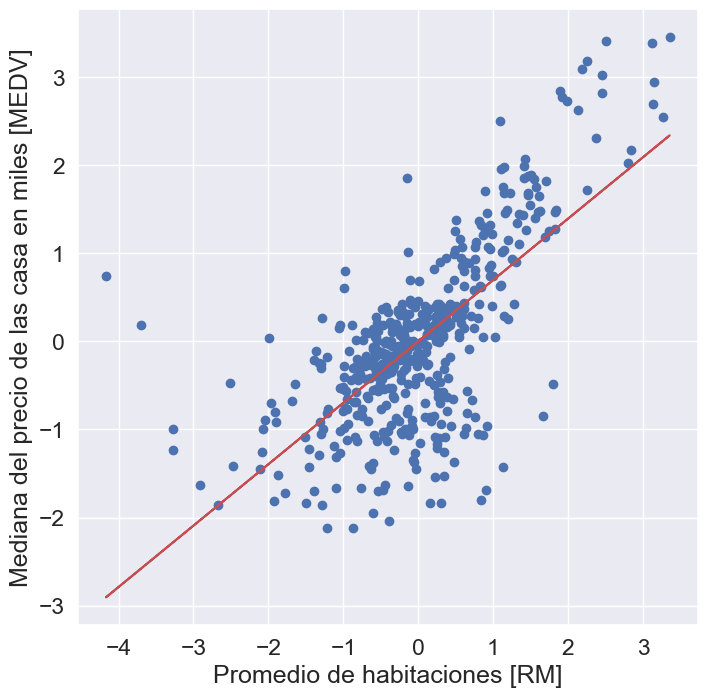

In [21]:
fig = plt.figure(figsize=(8,8))
plt.scatter(standarX, standarY)
plt.plot(standarX,predict, color = "r")
plt.ylabel("Mediana del precio de las casa en miles [MEDV]")
plt.xlabel("Promedio de habitaciones [RM]")


Generando predicción con el Modelo

In [22]:
num_habitaciones = 5
num_habitaciones_standar = scX.transform(np.array([num_habitaciones]).reshape(-1,1))

In [23]:
pred_num_habitaciones = scY.inverse_transform(slr.predict(num_habitaciones_standar))

In [24]:
type(pred_num_habitaciones)

numpy.ndarray

In [25]:
print("El precio de una casa con 5 habitaciones en boston es de: ", pred_num_habitaciones[0])

El precio de una casa con 5 habitaciones en boston es de:  [232209.04890668]
